In [3]:
# Load libraries
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **[1] LOAD DATA**

In [4]:
from sklearn.datasets import load_iris;
iris = load_iris();
data = pd.DataFrame(iris.data);
data.columns = iris.feature_names
data["Species"] = iris.target;
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# **[2] SET VARIABLE TYPES**

In [ ]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object

Is Species an int?

In [ ]:
# Option B
data.loc[data["Species"] == 0, "Species"] = iris.target_names[0]
data.loc[data["Species"] == 1, "Species"] = iris.target_names[1]
data.loc[data["Species"] == 2, "Species"] = iris.target_names[2]

In [ ]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species               object
dtype: object

If we want to cast a particular variable we will do the following

In [ ]:
new_data = data.astype({'sepal length (cm)': 'int32'})
new_data.dtypes

sepal length (cm)      int32
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species               object
dtype: object

# **[3] EDA**

## **[3.1] Statistics**

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

## **[3.2] Visualization**

### **[3.2.1] Numerical**

#### [3.2.1.1] Scatter plot

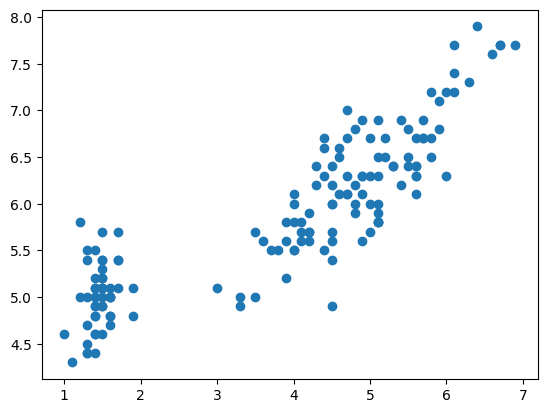

In [ ]:
plt.scatter(x = data['petal length (cm)'], y = data['sepal length (cm)'])

*seaborn* library has some extra functionality.

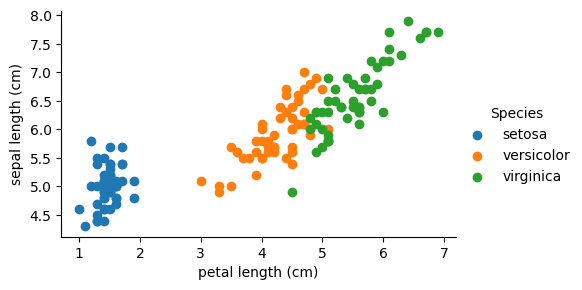

In [ ]:
fg = sns.FacetGrid(data = data, hue = 'Species', hue_order = iris.target_names, aspect=1.61)
fg.map(plt.scatter, 'petal length (cm)', 'sepal length (cm)').add_legend()

#### [3.2.1.2] Line plot

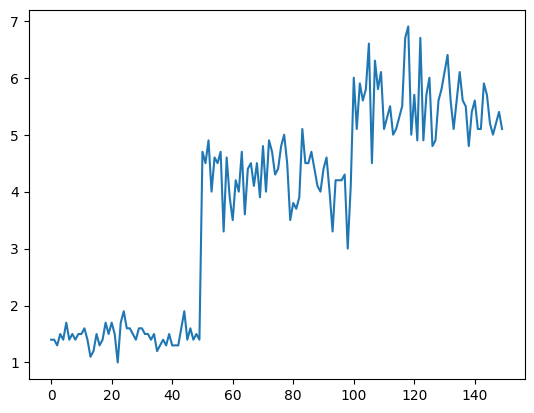

In [ ]:
plt.plot(data['petal length (cm)'])

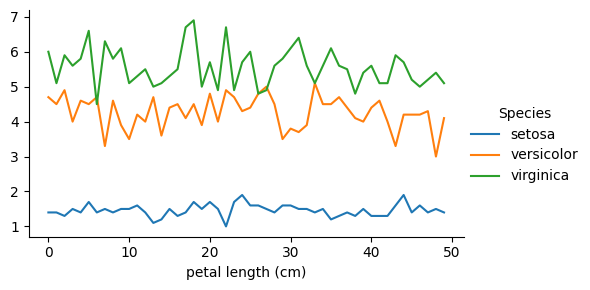

In [ ]:
fg = sns.FacetGrid(data = data, hue = 'Species', hue_order = iris.target_names, aspect=1.61)
fg.map(plt.plot, 'petal length (cm)').add_legend()

#### [3.2.1.3] **Histogram**

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

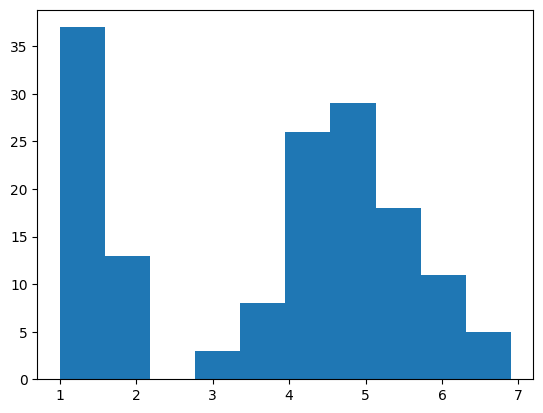

In [ ]:
plt.hist(data['petal length (cm)'])

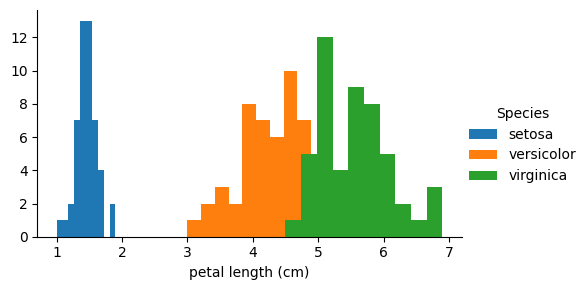

In [ ]:
fg = sns.FacetGrid(data = data, hue = 'Species', hue_order = iris.target_names, aspect=1.61)
fg.map(plt.hist, 'petal length (cm)').add_legend()

#### [3.2.1.4] **Boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x7ed8d070b490>,
 'caps': [<matplotlib.lines.Line2D at 0x7ed8d070b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ed8d070b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ed8d070bf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ed8d05feb00>],
 'means': []}

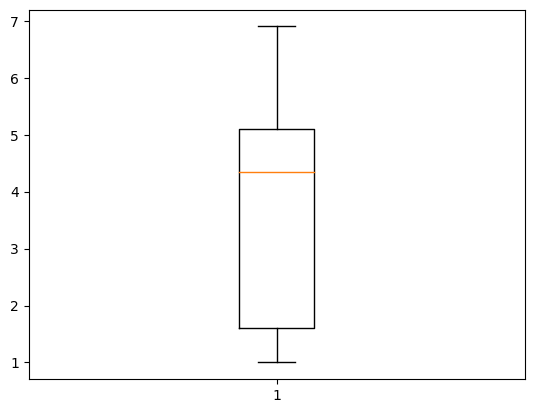

In [ ]:
plt.boxplot(data['petal length (cm)'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


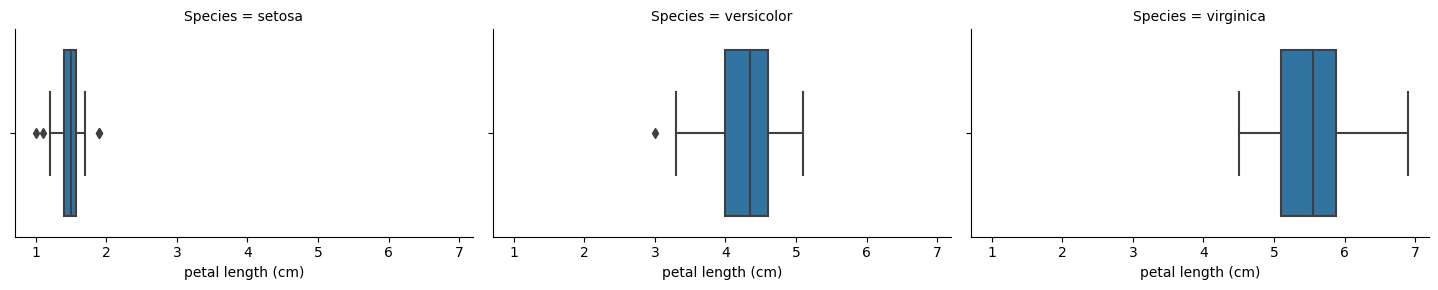

In [ ]:
fg = sns.FacetGrid(data = data, col = 'Species', aspect=1.61)
fg.map(sns.boxplot, 'petal length (cm)')

[3.2.1.5] Density plot

<Axes: xlabel='petal length (cm)', ylabel='Count'>

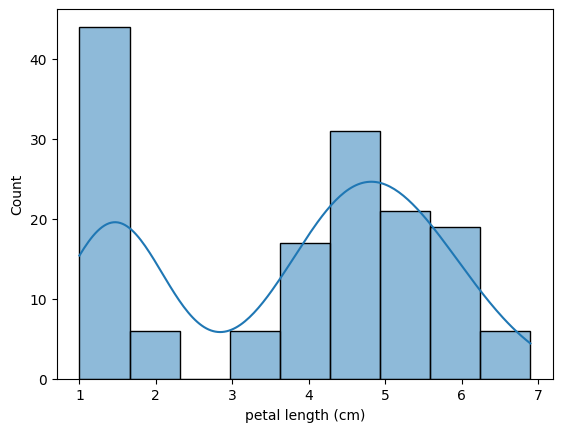

In [ ]:
# Density Plot and Histogram of all arrival delays
sns.histplot(data['petal length (cm)'],
            kde = True)

### **[3.2.2] Categorical**

### [3.2.2.1] Barplot

<BarContainer object of 3 artists>

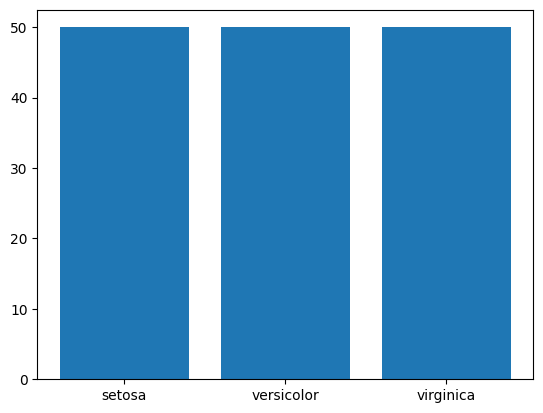

In [ ]:
plt.bar(x = iris.target_names, height = dat['Species'].value_counts())

### [3.2.2.2] Piechart

([<matplotlib.patches.Wedge at 0x7ed8d06994e0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

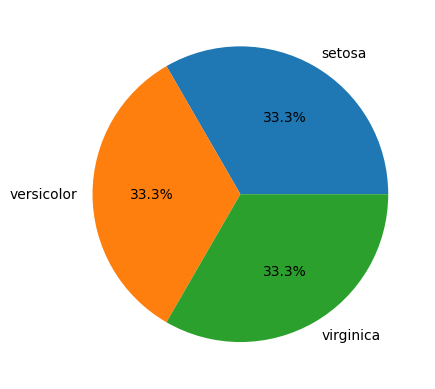

In [ ]:
plt.pie(x = dat['Species'].value_counts(), labels = iris.target_names, autopct='%1.1f%%')

### [3.2.2.3] Lineplot

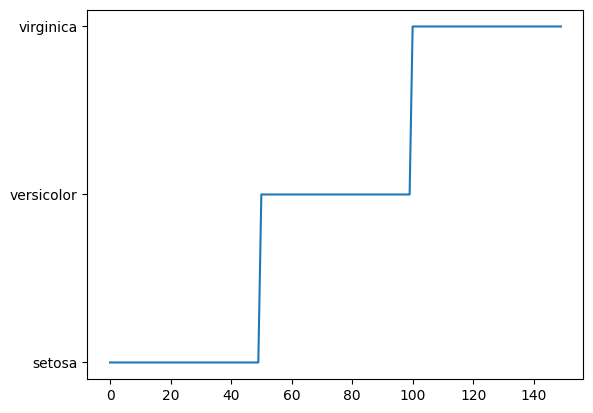

In [ ]:
plt.plot(data['Species'])

## **[4] MISSING VALUES**

Let's load mtcars dataset with missing values (did you miss it? ;p).

In [6]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/datasets/mtcars_missing.csv')
data

Mounted at /content/drive


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,NaN,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1.0,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1.0,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0.0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0.0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0.0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0.0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0.0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,NaN,22.90,1,0.0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0.0,4,4


In [ ]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,31.000000,32.000000,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,30.000000,32.000000,32.0000
mean,20.048387,6.187500,230.721875,146.687500,3.596563,3.219419,17.848750,0.437500,0.400000,3.687500,2.8125
std,6.121757,1.785922,123.938694,68.562868,0.534679,0.994553,1.786943,0.504016,0.498273,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.350000,4.000000,120.825000,96.500000,3.080000,2.542500,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.435000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.650000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
new_data = data.fillna(-9999)

In [ ]:
new_data.head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,-9999.0,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1.0,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1.0,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0.0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0.0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0.0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0.0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0.0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,-9999.000,22.90,1,0.0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0.0,4,4


In [ ]:
new_data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,-293.046875,6.187500,230.721875,146.687500,3.596563,-309.349938,17.848750,0.437500,-624.562500,3.687500,2.8125
std,1771.144502,1.785922,123.938694,68.562868,0.534679,1768.159565,1.786943,0.504016,2459.199371,0.737804,1.6152
min,-9999.000000,4.000000,71.100000,52.000000,2.760000,-9999.000000,14.500000,0.000000,-9999.000000,3.000000,1.0000
25%,15.200000,4.000000,120.825000,96.500000,3.080000,2.428750,16.892500,0.000000,0.000000,3.000000,2.0000
50%,18.950000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
new_data = data.fillna({'wt': 0, 'am': -9999})
new_data.head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,-9999.0,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1.0,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1.0,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0.0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0.0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0.0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0.0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0.0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,0.000,22.90,1,0.0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0.0,4,4


# **[5] Outliers**

In [ ]:
data.loc[0, 'disp'] = 1000

<Axes: >

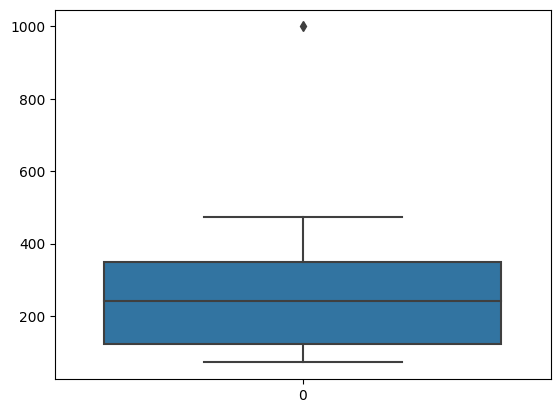

In [ ]:
sns.boxplot(data['disp'])

In [8]:
q1 = np.percentile(data['disp'], 25)
q3 = np.percentile(data['disp'], 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = np.where((data['disp'] < q1 - threshold) | (data['disp'] > q3 + threshold))

print("Outliers: \n", data.loc[outliers, 'disp'])

Outliers: 
 Series([], Name: disp, dtype: float64)


In [ ]:
def outliers_list(x):
  if (x.dtypes) != 'object':
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    outliers = np.where((x < q1 - threshold) | (x > q3 + threshold))
    print("Outliers of ", x.name, ": \n", x.iloc[outliers].values)
    return(outliers)
  else:
    return None


In [ ]:
data.apply(outliers_list)

Outliers of  mpg : 
 []
Outliers of  cyl : 
 []
Outliers of  disp : 
 [1000.]
Outliers of  hp : 
 [335]
Outliers of  drat : 
 []
Outliers of  wt : 
 []
Outliers of  qsec : 
 [22.9]
Outliers of  vs : 
 []
Outliers of  am : 
 []
Outliers of  gear : 
 []
Outliers of  carb : 
 [8]


model       None
mpg        ([],)
cyl        ([],)
disp      ([0],)
hp       ([30],)
drat       ([],)
wt         ([],)
qsec      ([8],)
vs         ([],)
am         ([],)
gear       ([],)
carb     ([30],)
dtype: object

# **[6] CORRELATION**

## **[6.1] Matrix**

In [ ]:
corr = data.corr(numeric_only = True)
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.865870,-0.551075,-0.776717,0.685360,-0.869859,0.417199,0.670534,0.619154,0.479029,-0.550039
cyl,-0.865870,1.000000,0.594575,0.832447,-0.699938,0.799993,-0.591242,-0.810812,-0.518736,-0.492687,0.526988
disp,-0.551075,0.594575,1.000000,0.455841,-0.396441,0.512363,-0.408258,-0.608856,-0.573512,-0.313133,0.375864
hp,-0.776717,0.832447,0.455841,1.000000,-0.448759,0.663381,-0.708223,-0.723097,-0.220903,-0.125704,0.749812
drat,0.685360,-0.699938,-0.396441,-0.448759,1.000000,-0.715485,0.091205,0.440278,0.703740,0.699610,-0.090790
wt,-0.869859,0.799993,0.512363,0.663381,-0.715485,1.000000,-0.196406,-0.564229,-0.694000,-0.584111,0.428296
qsec,0.417199,-0.591242,-0.408258,-0.708223,0.091205,-0.196406,1.000000,0.744535,-0.221829,-0.212682,-0.656249
vs,0.670534,-0.810812,-0.608856,-0.723097,0.440278,-0.564229,0.744535,1.000000,0.190941,0.206023,-0.569607
am,0.619154,-0.518736,-0.573512,-0.220903,0.703740,-0.694000,-0.221829,0.190941,1.000000,0.793850,0.016793
gear,0.479029,-0.492687,-0.313133,-0.125704,0.699610,-0.584111,-0.212682,0.206023,0.793850,1.000000,0.274073


## **[6.2] Visualization**

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.865870,-0.551075,-0.776717,0.685360,-0.869859,0.417199,0.670534,0.619154,0.479029,-0.550039
cyl,-0.865870,1.000000,0.594575,0.832447,-0.699938,0.799993,-0.591242,-0.810812,-0.518736,-0.492687,0.526988
disp,-0.551075,0.594575,1.000000,0.455841,-0.396441,0.512363,-0.408258,-0.608856,-0.573512,-0.313133,0.375864
hp,-0.776717,0.832447,0.455841,1.000000,-0.448759,0.663381,-0.708223,-0.723097,-0.220903,-0.125704,0.749812
drat,0.685360,-0.699938,-0.396441,-0.448759,1.000000,-0.715485,0.091205,0.440278,0.703740,0.699610,-0.090790
wt,-0.869859,0.799993,0.512363,0.663381,-0.715485,1.000000,-0.196406,-0.564229,-0.694000,-0.584111,0.428296
qsec,0.417199,-0.591242,-0.408258,-0.708223,0.091205,-0.196406,1.000000,0.744535,-0.221829,-0.212682,-0.656249
vs,0.670534,-0.810812,-0.608856,-0.723097,0.440278,-0.564229,0.744535,1.000000,0.190941,0.206023,-0.569607
am,0.619154,-0.518736,-0.573512,-0.220903,0.703740,-0.694000,-0.221829,0.190941,1.000000,0.793850,0.016793
gear,0.479029,-0.492687,-0.313133,-0.125704,0.699610,-0.584111,-0.212682,0.206023,0.793850,1.000000,0.274073
